In [23]:
import sys
import csv
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [24]:
sys.path.insert(0,'/Users/Lorena/ML_IPAM/IPAM2021_ML/algo/GPR/gpytorch')
from data_conditioning import *

# Read training and testing data

In [25]:
_, train_data = extractData('/Users/Lorena/ML_IPAM/ipam_NS_set/train_NS.csv')
_, test_data = extractData('/Users/Lorena/ML_IPAM/ipam_NS_set/test_NS.csv')

In [26]:
ytrain = train_data[:,1:5]
xtrain = train_data[:,9:13]
ytest = test_data[:,1:5]
xtest = test_data[:,9:13]

In [27]:
print('The number of rows of training data is: ', len(ytrain))
print('The number of rows of testing data is: ', len(ytest))
test_percentage = round((len(ytest)/len(ytrain))*100)
print(f'The breakdown of training/testing data is {100-test_percentage}/{test_percentage}')

The number of rows of training data is:  139999
The number of rows of testing data is:  59999
The breakdown of training/testing data is 57/43


# Read predictions

In [28]:
def extract_predicted_data(filename, verbose=False):
    """ Reads data from csv file and returns it in array form.
    Parameters
    ----------
    filename : str
        File path of data file to read
    Returns
    -------
    data : arr
    """
    lst=[]
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for row in csv_reader:
            lst.append(row)
    data=np.array(lst, dtype=float)
    if verbose:
        print(filename, 'loaded')
    return data

predicted_data = extract_predicted_data('../data_files/regression_results_50its_gpu.csv')

# Define error functions to plot

Treat mass and spin data separately since zero spins cause a division problem. One could choose a very small spin, but for now I will keep it this way.

In [29]:
predicted_masses = predicted_data[:,:2] #first two columns are mass values
ytest_masses = ytest[:,:2]
xtest_masses = xtest[:,:2]
predicted_spins = predicted_data[:,2:] #last two columns are spin values
ytest_spins = ytest[:,2:]
xtest_spins = xtest[:,2:]

In [30]:
# Error definitions for predicted masses
abs_rel_err_M = np.abs((ytest_masses - predicted_masses)/ytest_masses)
rel_err_M = (ytest_masses - predicted_masses)/ytest_masses
abs_diff_M = np.abs(ytest_masses - predicted_masses)
diff_M = ytest_masses - predicted_masses

# Error definitions for recovered masses
rec_diff_M = ytest_masses - xtest_masses
rec_abs_diff_M = np.abs(ytest_masses - xtest_masses)
rec_rel_err_M = (ytest_masses - xtest_masses)/ytest_masses
rec_abs_rel_err_M = np.abs((ytest_masses - xtest_masses)/ytest_masses)

# Error definitions for predicted spins
abs_diff_S = np.abs(ytest_spins - predicted_spins)
diff_S = ytest_spins - predicted_spins

# Error definitions for recovered spins
rec_diff_S = ytest_spins - xtest_spins
rec_abs_diff_S = np.abs(ytest_spins - xtest_spins)

A bad R2 score does not necessarily mean that our model is wrong.

In [31]:
print("R2 score for predicted masses: %.2f" % r2_score(ytest_masses,predicted_masses))
print("Mean squared error for predicted masses: %.2f" % mean_squared_error(ytest_masses,predicted_masses))

print("R2 score for recovered masses: %.2f" % r2_score(ytest_masses,xtest_masses))
print("Mean squared error for recovered masses: %.2f" % mean_squared_error(ytest_masses,xtest_masses))

R2 score for predicted masses: 0.89
Mean squared error for predicted masses: 33.48
R2 score for recovered masses: 0.64
Mean squared error for recovered masses: 104.09


In [32]:
print("R2 score for predicted spins: %.2f" % r2_score(ytest_spins,predicted_spins))
print("Mean squared error for predicted spins: %.2f" % mean_squared_error(ytest_spins,predicted_spins))
     
print("R2 score for recovered spins: %.2f" % r2_score(ytest_spins,xtest_spins))
print("Mean squared error for recovered spins: %.2f" % mean_squared_error(ytest_spins,xtest_spins))

R2 score for predicted spins: 0.39
Mean squared error for predicted spins: 0.07
R2 score for recovered spins: -0.64
Mean squared error for recovered spins: 0.18


# Plotting

In [33]:
color_cycle = [
        (53/255.,  74/255.,  93/255.),   # black
        (59/255.,  153/255., 217/255.),  # blue
        (229/255., 126/255., 49/255.),   # orange
        (53/255.,  206/255., 116/255.),  # green
        (230/255., 78/255.,  67/255.),   # red
        (154/255., 91/255.,  179/255.),  # purple
        (240/255., 195/255., 48/255.),   # gold
        '#e377c2',                       # pink
        '#8c564b',                       # brown
        '#7f7f7f',                       # gray
        '#17becf',                       # teal
        '#bcbd22',                       # lime
    ]

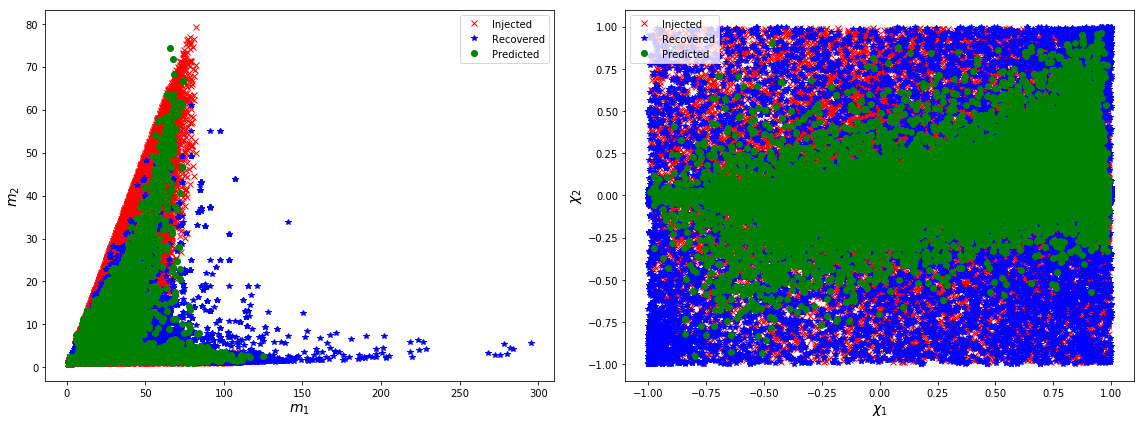

In [34]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(ytest_masses[:,0], ytest_masses[:,1], 'rx', zorder=-1, label='Injected')
ax[0].plot(xtest_masses[:,0], xtest_masses[:,1], 'b*', label='Recovered')
ax[0].plot(predicted_masses[:,0], predicted_masses[:,1], 'go', label='Predicted')   

ax[0].set_xlabel(r'$m_1$', fontsize=14)
ax[0].set_ylabel(r'$m_2$', fontsize=14)
ax[0].legend()

ax[1].plot(ytest_spins[:,0], ytest_spins[:,1], 'rx', zorder=-1, label='Injected')
ax[1].plot(xtest_spins[:,0], xtest_spins[:,1], 'b*', label='Recovered')
ax[1].plot(predicted_spins[:,0], predicted_spins[:,1], 'go', label='Predicted')

ax[1].set_xlabel(r'$\chi_1$', fontsize=14)
ax[1].set_ylabel(r'$\chi_2$', fontsize=14)
ax[1].legend()

plt.tight_layout()
outfile = '../figs/m1m2_chi1chi2_comparison.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

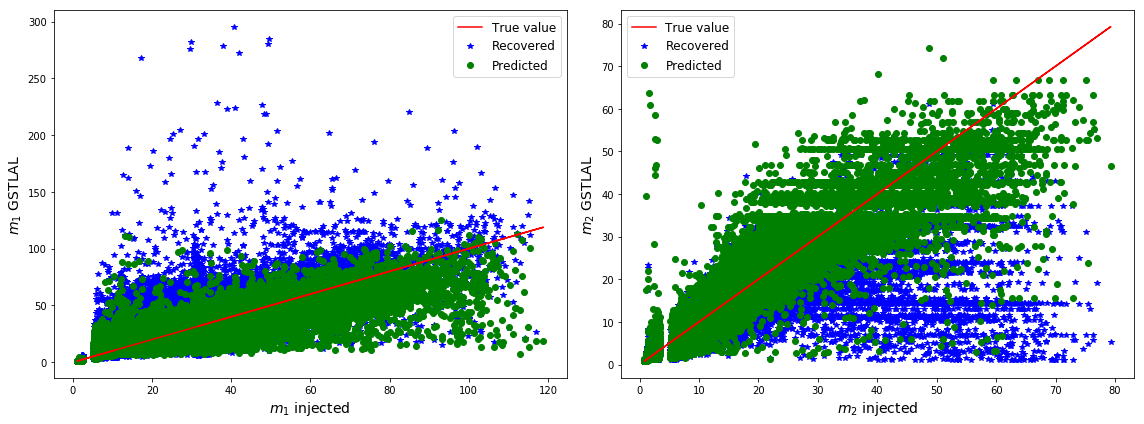

In [35]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#True values
ax[0].plot(ytest_masses[:,0], ytest_masses[:,0], 'r-', label='True value')     
ax[1].plot(ytest_masses[:,1], ytest_masses[:,1], 'r-', label='True value') 

#Recovered
ax[0].plot(ytest_masses[:,0], xtest_masses[:,0], 'b*', zorder=-1, label='Recovered')
ax[1].plot(ytest_masses[:,1], xtest_masses[:,1], 'b*', zorder=-1, label='Recovered')

#Predicted
ax[0].plot(ytest_masses[:,0], predicted_masses[:,0], 'go', zorder=-1, label='Predicted')       
ax[1].plot(ytest_masses[:,1], predicted_masses[:,1], 'go', zorder=-1, label='Predicted') 

ax[0].set_xlabel(r'$m_1$ injected', fontsize=14)
ax[0].set_ylabel(r'$m_1$ GSTLAL', fontsize=14)
ax[0].legend(fontsize=12)

ax[1].set_xlabel(r'$m_2$ injected', fontsize=14)
ax[1].set_ylabel(r'$m_2$ GSTLAL', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m1_m2_chi_comparisons.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

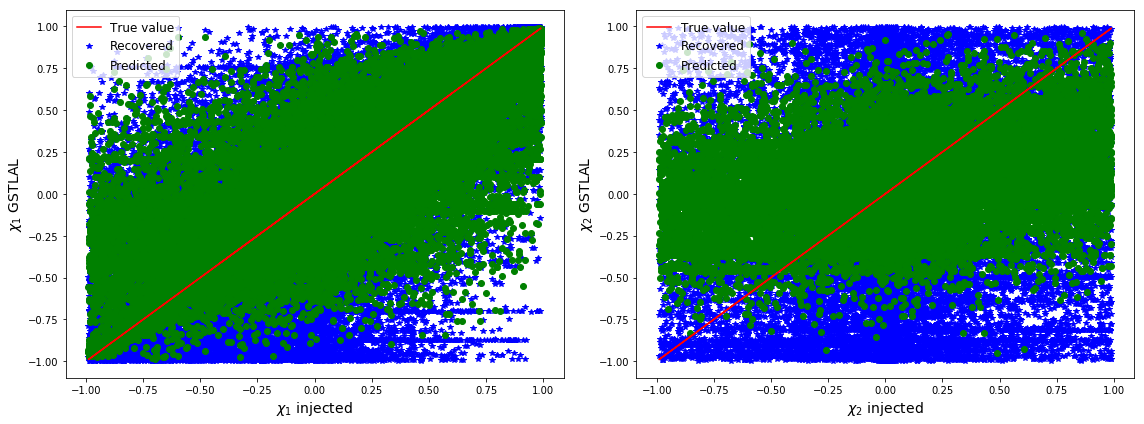

In [36]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#True values
ax[0].plot(ytest_spins[:,0], ytest_spins[:,0], 'r-', label='True value')     
ax[1].plot(ytest_spins[:,1], ytest_spins[:,1], 'r-', label='True value') 

#Recovered
ax[0].plot(ytest_spins[:,0], xtest_spins[:,0], 'b*', zorder=-1, label='Recovered')
ax[1].plot(ytest_spins[:,1], xtest_spins[:,1], 'b*', zorder=-1, label='Recovered')

#Predicted
ax[0].plot(ytest_spins[:,0], predicted_spins[:,0], 'go', zorder=-1, label='Predicted')       
ax[1].plot(ytest_spins[:,1], predicted_spins[:,1], 'go', zorder=-1, label='Predicted') 

ax[0].set_xlabel(r'$\chi_1$ injected', fontsize=14)
ax[0].set_ylabel(r'$\chi_1$ GSTLAL', fontsize=14)
ax[0].legend(fontsize=12)

ax[1].set_xlabel(r'$\chi_2$ injected', fontsize=14)
ax[1].set_ylabel(r'$\chi_2$ GSTLAL', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m_chi1_chi2_comparisons.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

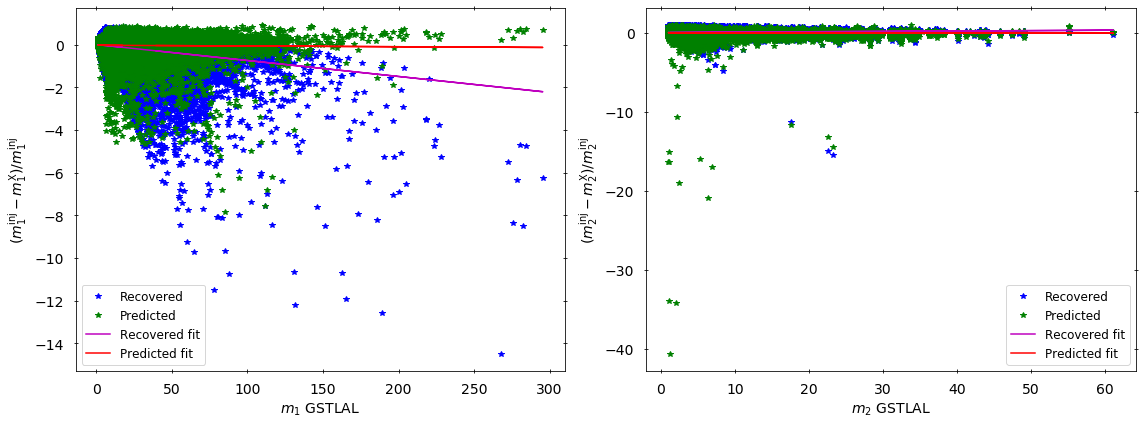

In [37]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#Recovered
ax[0].plot(xtest_masses[:,0], rec_rel_err_M[:,0], 'b*', label='Recovered')
ax[1].plot(xtest_masses[:,1], rec_rel_err_M[:,1], 'b*', label='Recovered')

#Predicted
ax[0].plot(xtest_masses[:,0], rel_err_M[:,0], 'g*', label='Predicted')
ax[1].plot(xtest_masses[:,1], rel_err_M[:,1], 'g*', label='Predicted')


#Linear fits
z = np.polyfit(xtest_masses[:,0], rec_rel_err_M[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_masses[:,0], p(xtest_masses[:,0]), 'm', label='Recovered fit')

z = np.polyfit(xtest_masses[:,0], rel_err_M[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_masses[:,0], p(xtest_masses[:,0]), 'r', label='Predicted fit')


z = np.polyfit(xtest_masses[:,1], rec_rel_err_M[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_masses[:,1], p(xtest_masses[:,1]), 'm', label='Recovered fit')

z = np.polyfit(xtest_masses[:,1], rel_err_M[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_masses[:,1], p(xtest_masses[:,1]), 'r', label='Predicted fit')


ax[0].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[1].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[0].set_xlabel(r'$m_1$ GSTLAL', fontsize=14)
ax[0].set_ylabel(r'$(m_1^{\mathrm{inj}}-m_1^{\mathrm{X}})/m_1^{\mathrm{inj}}$', fontsize=14)
ax[0].legend(fontsize=12)

ax[1].set_xlabel(r'$m_2$ GSTLAL', fontsize=14)
ax[1].set_ylabel(r'$(m_2^{\mathrm{inj}}-m_2^{\mathrm{X}})/m_2^{\mathrm{inj}}$', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m1_m2_chi_errors_and_fits.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

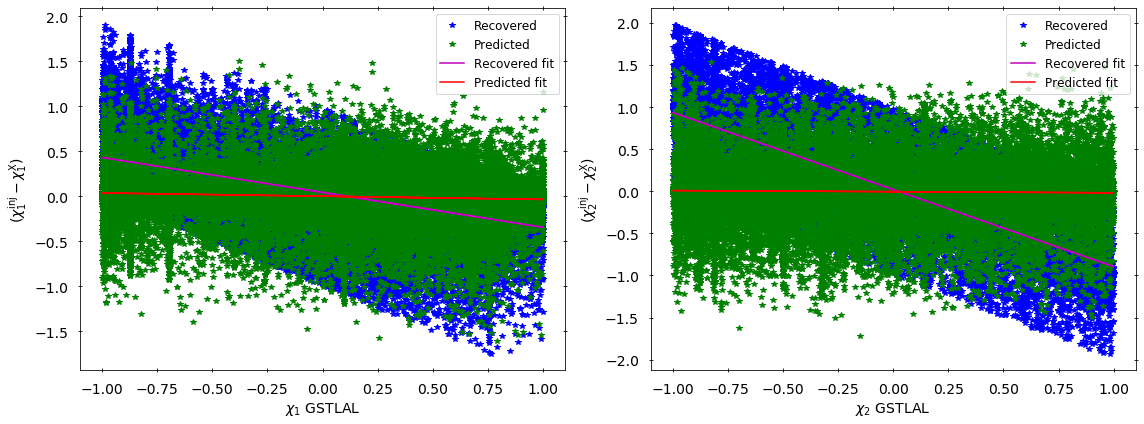

In [38]:
# Initialize plot
f, ax = plt.subplots(1, 2, figsize=(16, 6))

#Recovered
ax[0].plot(xtest_spins[:,0], rec_diff_S[:,0], 'b*', label='Recovered')
ax[1].plot(xtest_spins[:,1], rec_diff_S[:,1], 'b*', label='Recovered')

#Recovered
ax[0].plot(xtest_spins[:,0], diff_S[:,0], 'g*', label='Predicted')
ax[1].plot(xtest_spins[:,1], diff_S[:,1], 'g*', label='Predicted')

#Linear fits
z = np.polyfit(xtest_spins[:,0], rec_diff_S[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_spins[:,0], p(xtest_spins[:,0]), 'm', label='Recovered fit')

z = np.polyfit(xtest_spins[:,0], diff_S[:,0], 1)
p = np.poly1d(z)
ax[0].plot(xtest_spins[:,0], p(xtest_spins[:,0]), 'r', label='Predicted fit')


z = np.polyfit(xtest_spins[:,1], rec_diff_S[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_spins[:,1], p(xtest_spins[:,1]), 'm', label='Recovered fit')

z = np.polyfit(xtest_spins[:,1], diff_S[:,1], 1)
p = np.poly1d(z)
ax[1].plot(xtest_spins[:,1], p(xtest_spins[:,1]), 'r', label='Predicted fit')


ax[0].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[1].tick_params(axis='both', which='major', direction='inout', top=True, right=True, labelsize=14, pad=10)
ax[0].set_xlabel(r'$\chi_1$ GSTLAL', fontsize=14)
ax[0].set_ylabel(r'$(\chi_1^{\mathrm{inj}}-\chi_1^{\mathrm{X}})$', fontsize=14)
ax[0].legend(fontsize=12)
ax[1].set_xlabel(r'$\chi_2$ GSTLAL', fontsize=14)
ax[1].set_ylabel(r'$(\chi_2^{\mathrm{inj}}-\chi_2^{\mathrm{X}})$', fontsize=14)
ax[1].legend(fontsize=12)

plt.tight_layout()
outfile = '../figs/m_chi1_chi2_errors_and_fits.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

The mean error of m1 predicted is:  -0.02982220520052293
The mean error of m1 recovered is:  -0.17165694579435734
The mean error of m2 predicted is:  -0.017751239885053227
The mean error of m2 recovered is:  0.04958605593973233


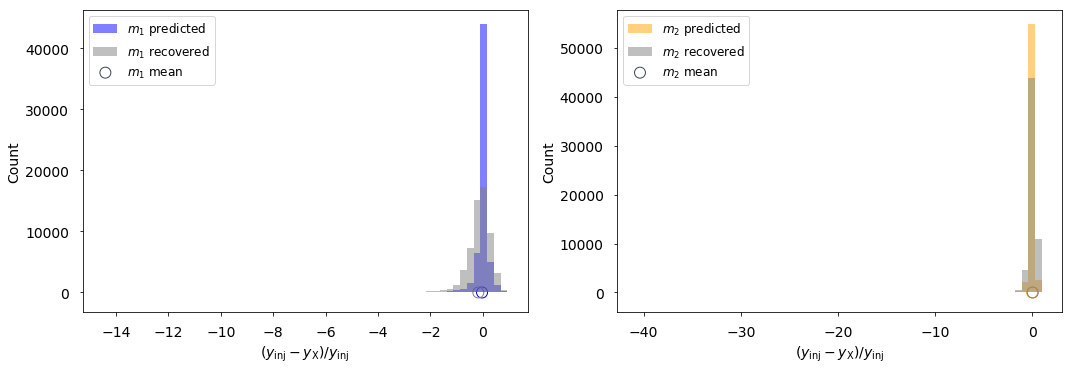

In [39]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [rel_err_M[:,0], rec_rel_err_M[:,0]]
hist, bins, _ = axis[0].hist(combined_epsilons, 60)
axis[0].clear()
axis[0].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[0].set_ylabel(r'Count', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ predicted','$m_1$ recovered']
for_printing = ['m1 predicted','m1 recovered']
color = ['blue','gray']

for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper left", fontsize=12)

###################

combined_epsilons = [rel_err_M[:,1], rec_rel_err_M[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 60)
axis[1].clear()
axis[1].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[1].set_ylabel(r'Count', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_2$ predicted','$m_2$ recovered']
for_printing = ['m2 predicted','m2 recovered']
color = ['orange','gray']

for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')
axis[1].legend(ncol = 1, loc="upper left", fontsize=12)

plt.tight_layout()
outfile = '../figs/m1_m2_chi_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

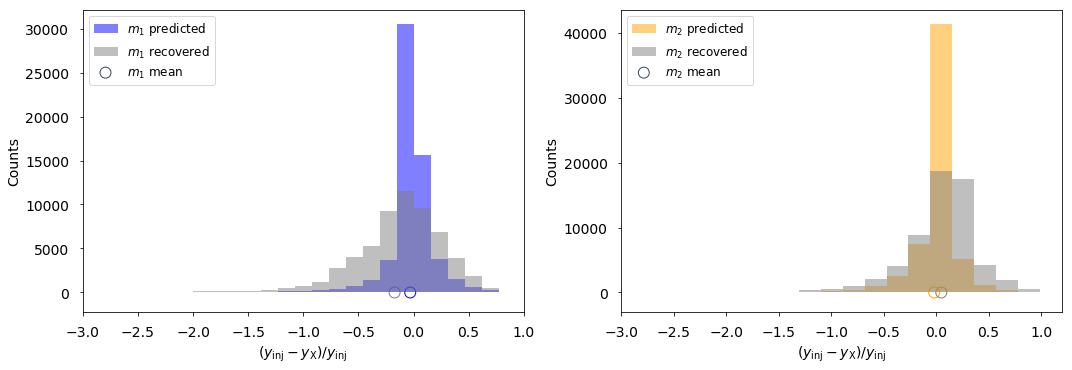

In [40]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [rel_err_M[:,0], rec_rel_err_M[:,0]]

hist, bins, _ = axis[0].hist(combined_epsilons, 100)
axis[0].clear()
axis[0].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ predicted','$m_1$ recovered']
for_printing = ['m1 predicted','m1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper left", fontsize=12)

###################

combined_epsilons = [rel_err_M[:,1], rec_rel_err_M[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 200)
axis[1].clear()
axis[1].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_2$ predicted','$m_2$ recovered']
for_printing = ['m2 predicted','m2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')    
axis[1].legend(ncol = 1, loc="upper left", fontsize=12)

axis[0].set_xlim((-3,1))
axis[1].set_xlim((-3,1.2))
plt.tight_layout()
outfile = '../figs/m1_m2_chi_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

The mean error of m1 predicted is:  0.1273440674745982
The mean error of m1 recovered is:  0.34841186834825766
The mean error of m2 predicted is:  0.11256868491061874
The mean error of m2 recovered is:  0.2557044517987952


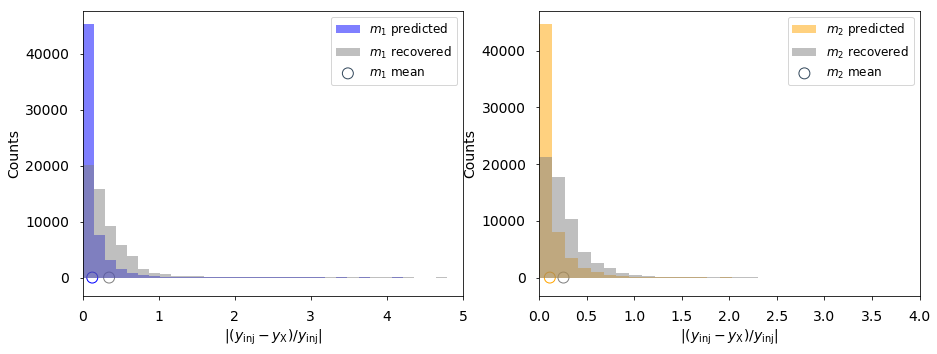

In [41]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [abs_rel_err_M[:,0], rec_abs_rel_err_M[:,0]]
hist, bins, _ = axis[0].hist(combined_epsilons, 100)
axis[0].clear()
axis[0].set_xlabel(r'$|\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}|$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ predicted','$m_1$ recovered']
for_printing = ['m1 predicted','m1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper right", fontsize=12)

###################

combined_epsilons = [abs_rel_err_M[:,1], rec_abs_rel_err_M[:,1]]
hist, bins, _ = axis[1].hist(combined_epsilons, 300)
axis[1].clear()
axis[1].set_xlabel(r'$|\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)/y_{\mathrm{inj}}|$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_2$ predicted','$m_2$ recovered']
for_printing = ['m2 predicted','m2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')
    
axis[1].legend(ncol = 1, loc="upper right", fontsize=12)
axis[0].set_xlim((0,5))
axis[1].set_xlim((0,4))
outfile = '../figs/m_chi1_chi2_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

The mean error of m1 predicted error is:  0.1273440674745982
The mean error of m2 predicted error is:  0.11256868491061874


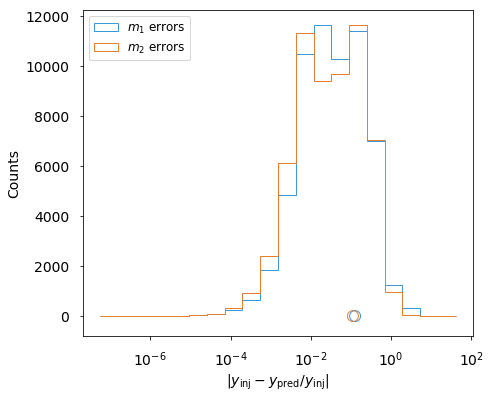

In [42]:
fig, axis = plt.subplots(1, figsize=(7,6))

combined_epsilons = [abs_rel_err_M[:,0], abs_rel_err_M[:,1]]

hist, bins, _ = axis.hist(combined_epsilons, 20)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
axis.clear()

axis.set_xlabel(r'$|y_{\mathrm{inj}}-y_{\mathrm{pred}}/y_{\mathrm{inj}}|$', fontsize=14)
axis.set_ylabel(r'Counts', fontsize=14)
axis.tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$m_1$ errors','$m_2$ errors']
for_printing = ['m1 predicted error','m2 predicted error']

color = ['blue', 'orange']
for i in range(len(combined_epsilons)):
    axis.hist(combined_epsilons[i], bins=logbins, histtype=u'step', label=labels[i], color=color_cycle[i+1], ls=styles[i])
    point = axis.scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color_cycle[i+1])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis.set_xscale('log')
axis.legend(ncol = 1, loc="upper left", fontsize=12)
plt.show()

The mean error of spin1 predicted is:  -0.0019728719610315505
The mean error of spin1 recovered is:  -0.0028897930965516095
The mean error of spin2 predicted is:  -0.0031431884399642793
The mean error of spin2 recovered is:  0.0658909786663111


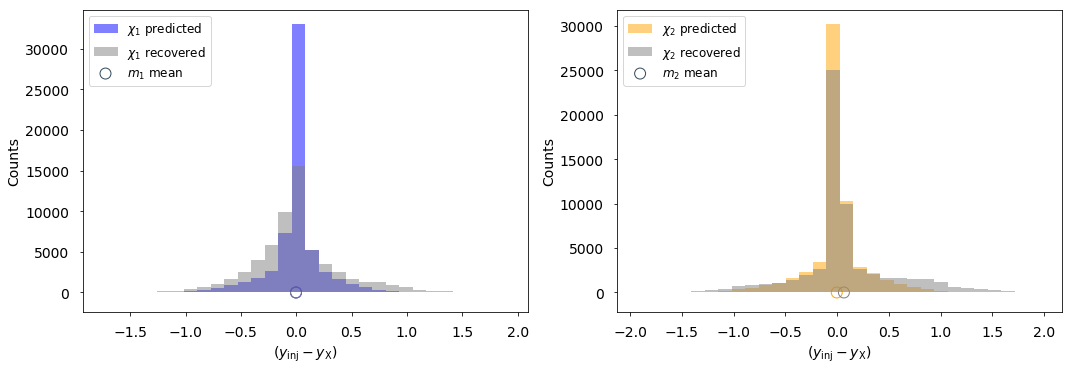

In [44]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [diff_S[:,0], rec_diff_S[:,0]]

hist, bins, _ = axis[0].hist(combined_epsilons, 30)
axis[0].clear()
axis[0].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_1$ predicted','$\chi_1$ recovered']
for_printing = ['spin1 predicted','spin1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper left", fontsize=12)

###################

combined_epsilons = [diff_S[:,1], rec_diff_S[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 30)
axis[1].clear()
axis[1].set_xlabel(r'$\left(y_{\mathrm{inj}}-y_{\mathrm{X}}\right)$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_2$ predicted','$\chi_2$ recovered']
for_printing = ['spin2 predicted','spin2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')    
axis[1].legend(ncol = 1, loc="upper left", fontsize=12)

plt.tight_layout()
outfile = '../figs/m_chi1_chi2_error_analysis_wboxes.png'
plt.savefig(outfile, bbox_inches="tight")
plt.show()

The mean error of spin1 predicted is:  0.1368109091487541
The mean error of spin1 recovered is:  0.2667453786896448
The mean error of spin2 predicted is:  0.1559512795096083
The mean error of spin2 recovered is:  0.27354473502891713


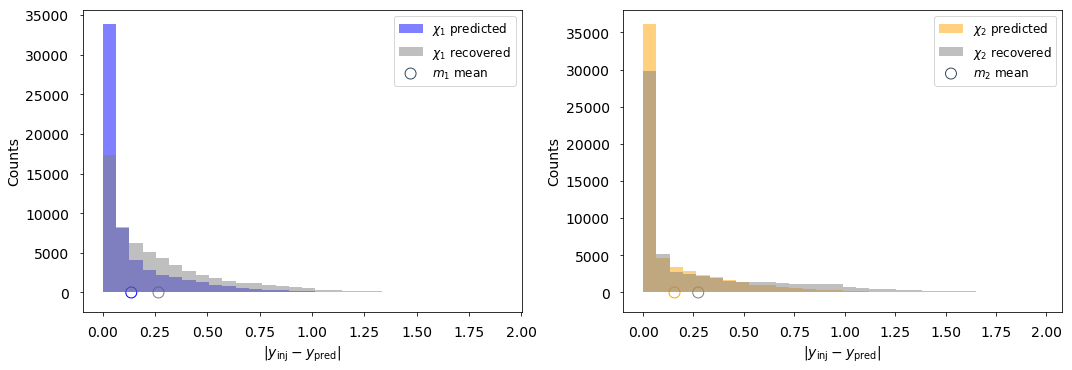

In [45]:
fig, axis = plt.subplots(1,2, figsize=(15,5.25))

combined_epsilons = [abs_diff_S[:,0], rec_abs_diff_S[:,0]]

hist, bins, _ = axis[0].hist(combined_epsilons, 30)
axis[0].clear()
axis[0].set_xlabel(r'$|y_{\mathrm{inj}}-y_{\mathrm{pred}}|$', fontsize=14)
axis[0].set_ylabel(r'Counts', fontsize=14)
axis[0].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_1$ predicted','$\chi_1$ recovered']
for_printing = ['spin1 predicted','spin1 recovered']

color = ['blue','gray']
for i in range(len(combined_epsilons)):
    axis[0].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[0].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)

axis[0].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_1$ mean')
axis[0].legend(ncol = 1, loc="upper right", fontsize=12)

###################

combined_epsilons = [abs_diff_S[:,1], rec_abs_diff_S[:,1]]

hist, bins, _ = axis[1].hist(combined_epsilons, 30)
axis[1].clear()
axis[1].set_xlabel(r'$|y_{\mathrm{inj}}-y_{\mathrm{pred}}|$', fontsize=14)
axis[1].set_ylabel(r'Counts', fontsize=14)
axis[1].tick_params(axis='both', which='major', labelsize=14, pad=10)
styles = ['-','-']
labels = ['$\chi_2$ predicted','$\chi_2$ recovered']
for_printing = ['spin2 predicted','spin2 recovered']

color = ['orange','gray']
for i in range(len(combined_epsilons)):
    axis[1].hist(combined_epsilons[i], bins=bins, label=labels[i], ls=styles[i],facecolor=color[i], alpha=0.5)
    point = axis[1].scatter(x=np.mean(combined_epsilons[i]), y=0, s=120, facecolors='none', edgecolors=color[i])
    print('The mean error of', for_printing[i] , 'is: ',np.mean(combined_epsilons[i]))
    point.set_clip_on(False)
    
axis[1].scatter(x=[None],y=0, s=120, facecolors='none', color=color_cycle[0], label='$m_2$ mean')    
axis[1].legend(ncol = 1, loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()